### Using VGG16 

In [15]:
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [16]:
model = VGG16(weights='imagenet')

In [17]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

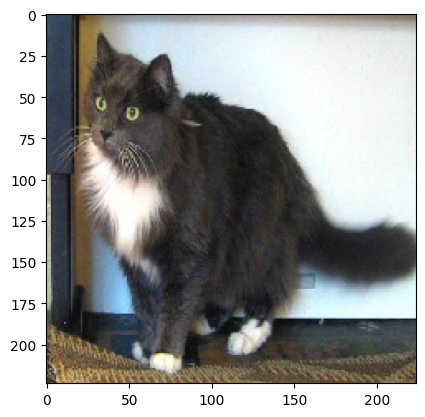

In [18]:
image = load_img('./test_set/9.jpg', target_size=(224,224)) # fill out later
plt.imshow(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min max (before) = 0.0 255.0
min max (after) = -121.68 151.061


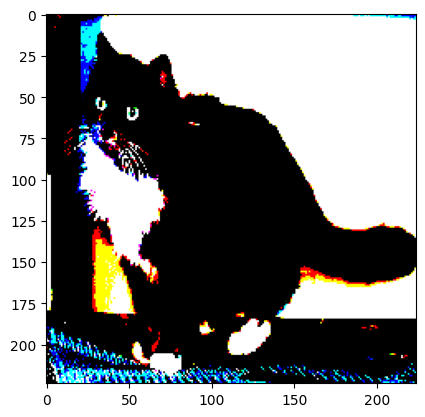

In [19]:
image = img_to_array(image)
print('min max (before) =', image.min(), image.max())

# reshape
image = np.expand_dims(image, axis=0)

# adjust scale with VGG model
image = preprocess_input(image)
print('min max (after) =', image.min(), image.max())
plt.imshow(image[0])

In [20]:
image.shape

(1, 224, 224, 3)

In [21]:
pred = model.predict(image)

1/1 [==============================] - 0s 158ms/step


In [22]:
# decode whether label is in top 3
pred_decode = decode_predictions(pred, top=3)
pred_decode

[[('n02123394', 'Persian_cat', 0.19121218),
  ('n02870880', 'bookcase', 0.05555614),
  ('n03782006', 'monitor', 0.05246178)]]

In [23]:
def predict(img_frame):
	img = load_img(img_frame, target_size=(224, 224))
	plt.imshow(img)
	img = img_to_array(img)
	img = np.expand_dims(img, axis=0)
	img = preprocess_input(img)


	pre = model.predict(img)
	pred_decode = decode_predictions(pred, top=3)[0]

	print('Predicted: {} {:.2f}'.format(pred_decode[0][1], pred_decode[0][2] * 100))
	for i in pred_decode:
		print('{:17} {:6.3f}'.format(i[1],i[2]))

1/1 [==============================] - 0s 22ms/step
Predicted: Persian_cat 19.12
Persian_cat        0.191
bookcase           0.056
monitor            0.052


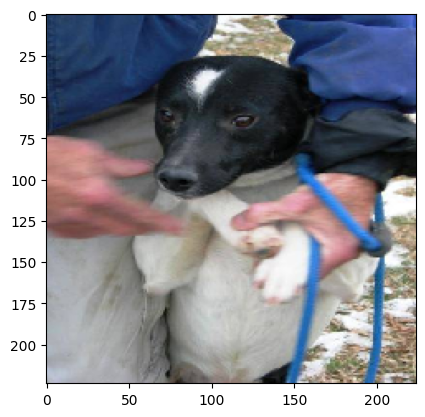

In [24]:
predict('./test_set/1.jpg')

1/1 [==============================] - 0s 28ms/step
Predicted: Persian_cat 19.12
Persian_cat        0.191
bookcase           0.056
monitor            0.052


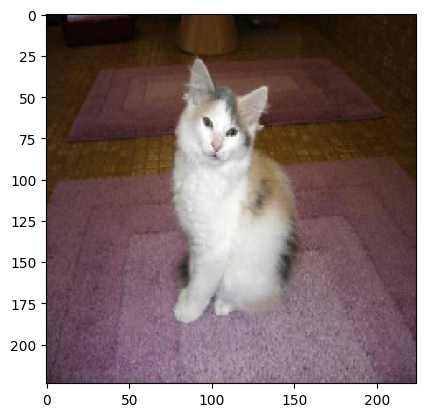

In [25]:
predict('./test_set/10.jpg')


In [26]:
def predict_dog_cat(lst):
	y_pred = []
	y_pred_cls = []
	img_lst = []

	# img = load_img(img_frame, target_size=(224, 224))
	# plt.imshow(img)
	# imt = img_to_array(img)
	# img = np.expand_dims(img, axis=0)
	# imt = preprocess_input(img)


	# pre = model.predict(img)
	# pred_decode = decode_predictions(pred, top=3)[0]

	for i in lst:
		# print(i)
		img = load_img(i, target_size=(224, 244))
		# plt.imshow(img)
		imt = img_to_array(img)
		img_lst.append(img)

		img = np.expand_dims(img, axis=0)
		img = preprocess_input(img)
		y_pred_i = model.predict(img)
		pred_decode_i = decode_predictions(y_pred_i, top=3)[0]
		# y_pred_cls_i = 'Dog' if y_pred_i[0][0] > 0.5 else 'Cat'
		y_pred.append(y_pred_i)
		y_pred_cls.append(pred_decode_i)

	return img_lst, y_pred_cls, y_pred

In [27]:
import glob

mylist = [f for f in glob.glob('./test_set/*')]
# mylist = ['./test_set/1.jpg','./test_set/2.jpg','./test_set/3.jpg','./test_set/4.jpg','./test_set/5.jpg','./test_set/6.jpg','./test_set/7.jpg','./test_set/8.jpg','./test_set/9.jpg','./test_set/10.jpg']
img_lst, y_pred_cls, y_pred = predict_dog_cat(mylist)

# mylist
# # for i in mylist:
# # 	print(os.path.basename(i), end= ' | ')

1/1 [==============================] - 0s 27ms/step


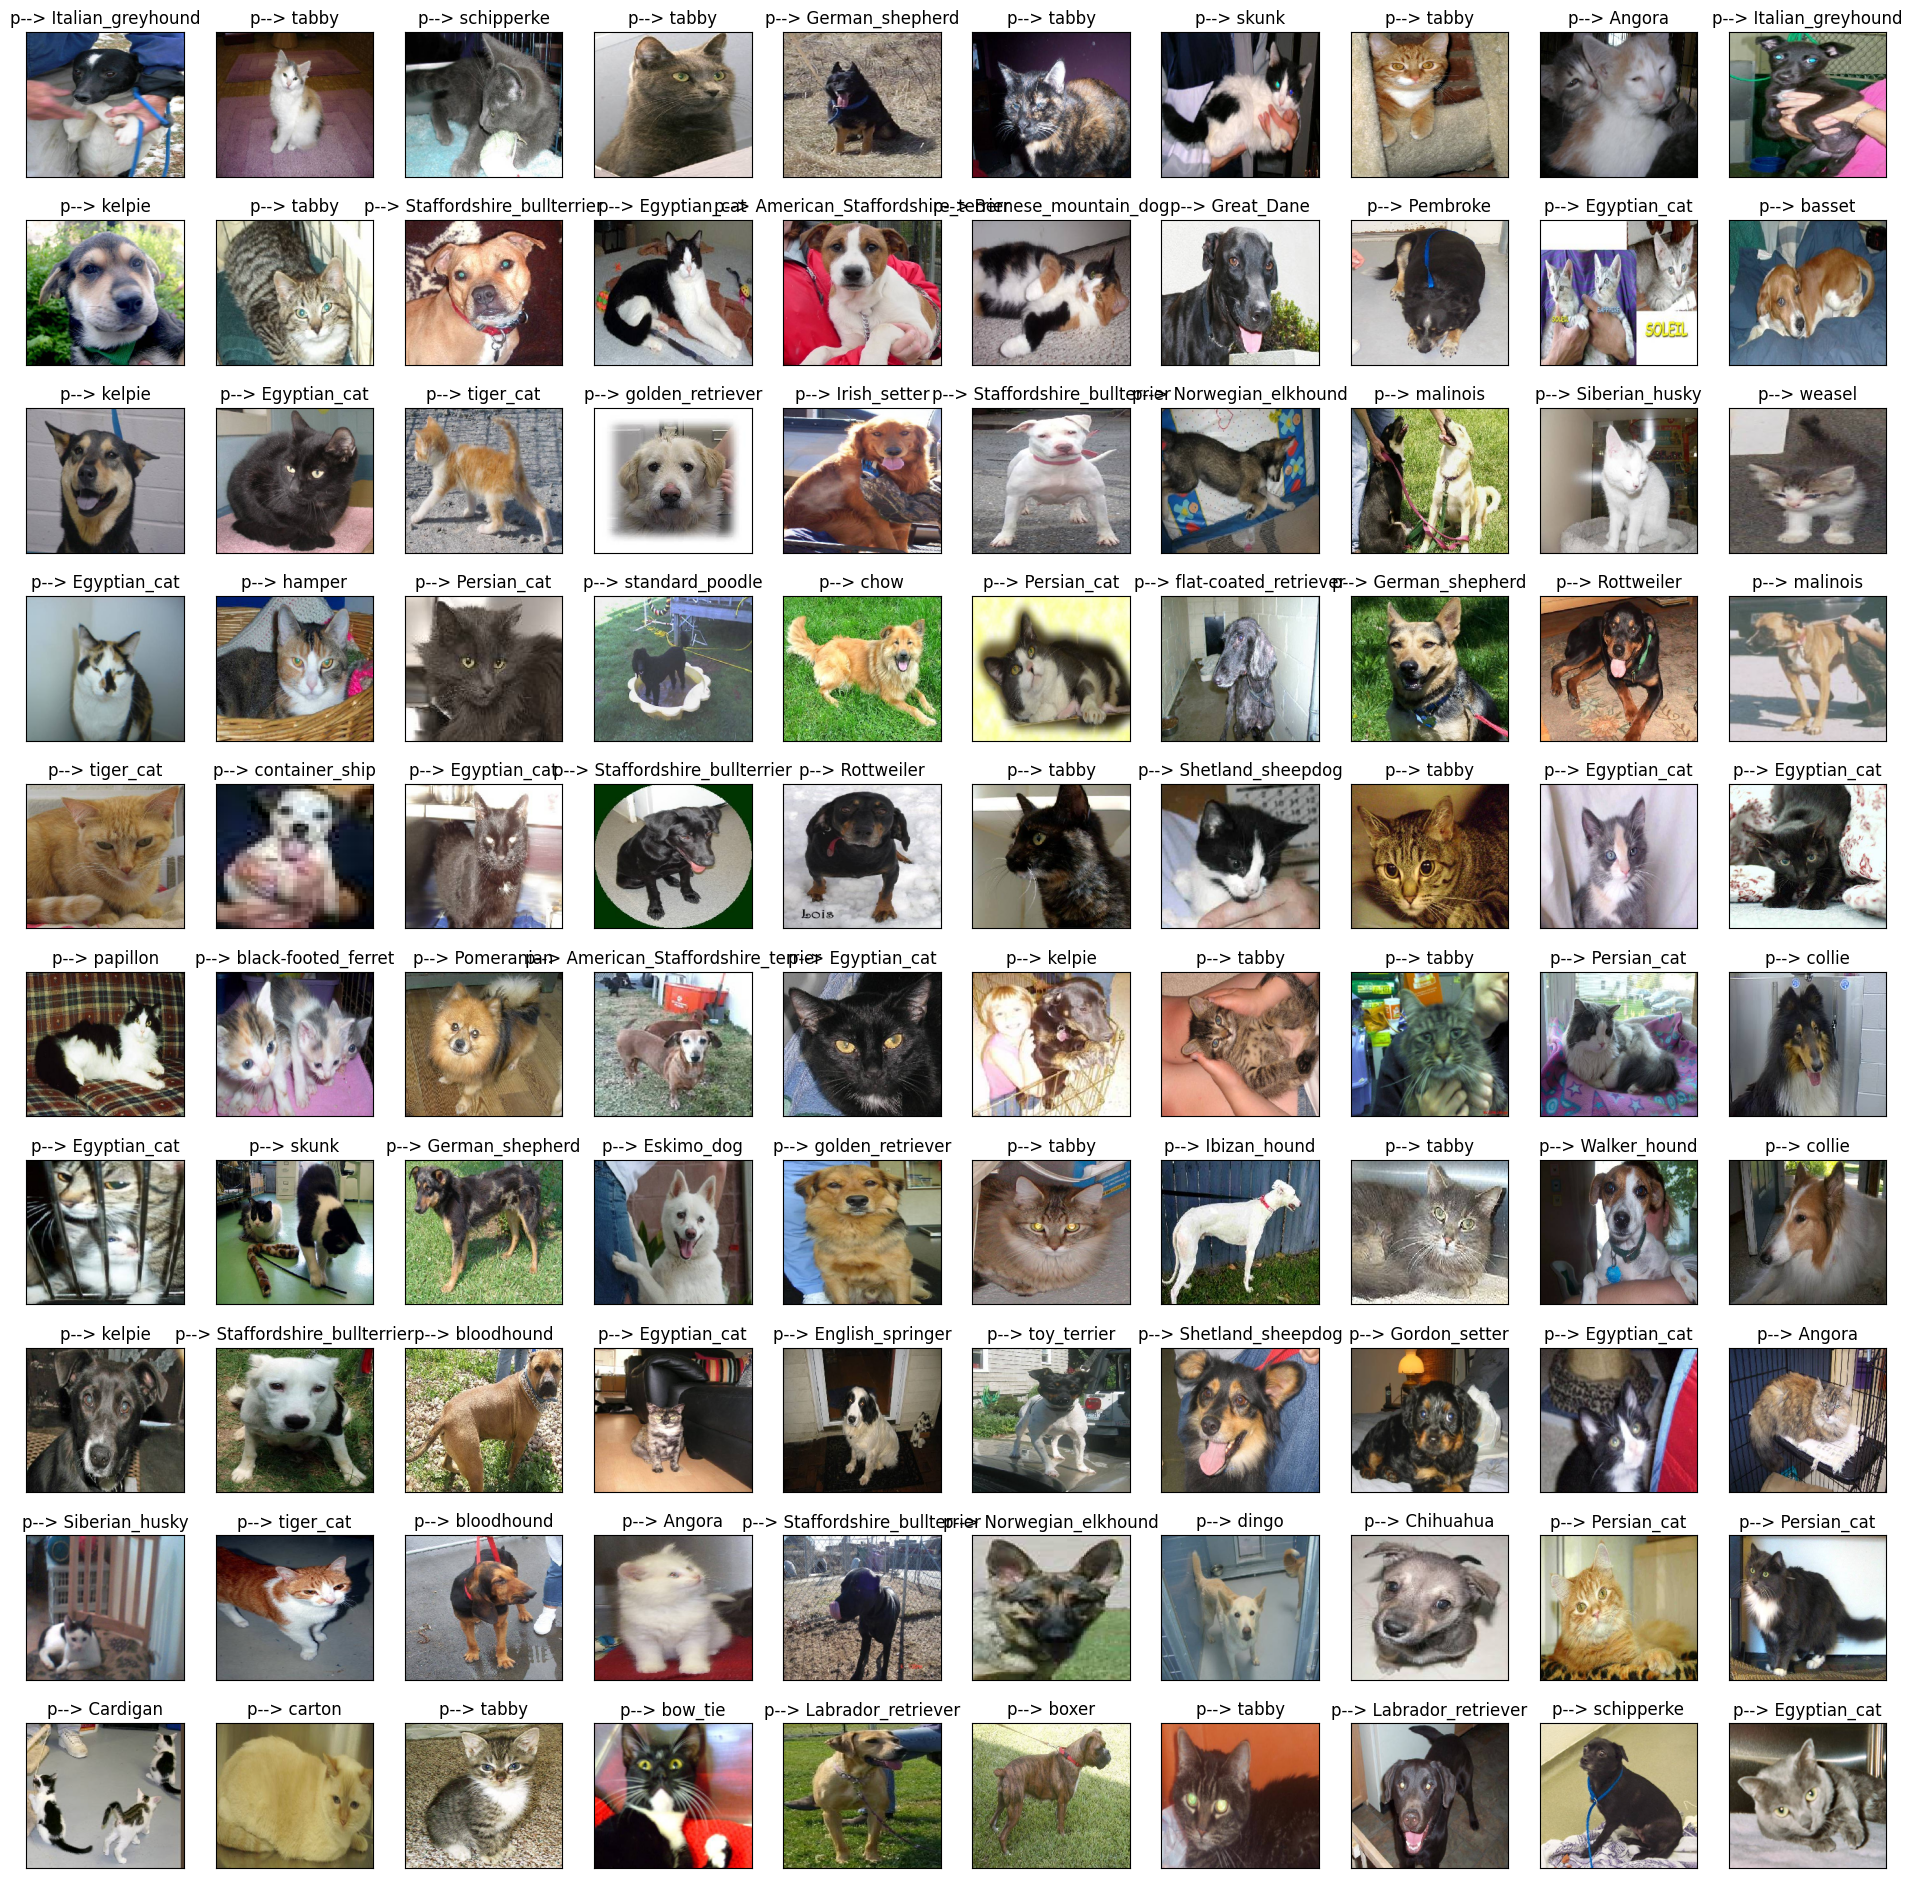

In [28]:
plt.figure(figsize=(24, 24))
for i,k in enumerate(img_lst):
	plt.subplot(10, 10, i + 1)
	plt.imshow(k)
	plt.title('p--> {}'.format(y_pred_cls[i][0][1]))
	plt.xticks([])
	plt.yticks([])
plt.show()